<a href="https://colab.research.google.com/github/Shreya-data/Play-Store-App-Reviews-Analysis/blob/main/PlayStore_User_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required librabies
import pandas as pd                 #data manipulation
import numpy as np                  #data manipulation
import matplotlib.pyplot as plt     #visualization tool
%matplotlib inline
import seaborn as sns               #visualisation tool
import warnings  
warnings.filterwarnings("ignore")  #for ingoring warning
sns.set()

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data from drive and introducing the variables to these dataset
play_store_data=pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
user_review_data=pd.read_csv("/content/drive/MyDrive/User Reviews.csv")


---
**Explore Play Store Dataset**
---

In [ ]:
#calling the variable of play store dataset
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#column names
play_store_data.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

---
**COLUMN NAMES OF PLAY STORE DATA**
---
**App**- Name of the apps.

**Category**- Category under which the app falls.

**Rating**- Applications rating in playstore.

**Reviews**- Number of reviews given to apps.

**Size**- Size of the apps.

**Installs**- Number of installs of the apps.

**Type**- app is free or paid.

**Price**- Price of the apps.

**Content Rating** - Appropriate target audience of the apps.

**Genres**- Genres under which the app fall.

**Last** **updated**- Date when the app last updated.

**Current** **Ver**- Current version of the apps.

**Android** **Ver**- The Android operating system the app is compatible with.

In [ ]:
#data understanding
print(f"There are total {play_store_data.shape[0]} rows and {play_store_data.shape[1]} columns in playstore dataframe.")

There are total 10841 rows and 13 columns in playstore dataframe.


In [ ]:
#information about data
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#statistical understanding of data
play_store_data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#duplicates
print("Duplicate entry in play_store_data:",len(play_store_data[play_store_data.duplicated()])) #total number of duplicates

Duplicate entry in play_store_data: 483


In [ ]:
#Remove Duplicates from playstore database
play_store_data1 = play_store_data.drop_duplicates() #remove duplicate 
play_store_data1.shape #shape after removing duplicates

(10358, 13)

In [ ]:
#making a DataFrame
def PlaystoreInfo():
  PSinfo_df = pd.DataFrame(index=play_store_data1.columns)
  PSinfo_df['Datatypes'] =  play_store_data1.dtypes
  PSinfo_df['Count of non-null values'] = play_store_data1.count()
  PSinfo_df['NaN values'] = play_store_data1.isnull().sum()
  PSinfo_df['% NaN Values'] = (PSinfo_df['NaN values']/len(play_store_data1)).round(4)*100 # or play_store_data1.isnull().mean()
  PSinfo_df['Unique_count'] = play_store_data1.nunique()
  return PSinfo_df
PlaystoreInfo() 


,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,10358,0,0.00,9660
Category,object,10358,0,0.00,34
Rating,float64,8893,1465,14.14,40
Reviews,object,10358,0,0.00,6002
Size,object,10358,0,0.00,462
Installs,object,10358,0,0.00,22
Type,object,10357,1,0.01,3
Price,object,10358,0,0.00,93
Content Rating,object,10357,1,0.01,6
Genres,object,10358,0,0.00,120


---
**Insights:**
---
From the above, we understand that except Rating columns, we are having a good dataset.

The number of null values are:

* **Rating** has 1465 null values which contributes 14.14% of the 
data.

* **Type** has 1 null value which contributes 0.01% of the data.

* **Content Rating** has 1 null value which contributes 0.01% of the data.

* **Current Ver** has 8 null values which contributes 0.08% of the data.

* **Android Ver** has 3 null values which contributes 0.03% of the data.

**We know that there is only one numeric type feature i.e. Rating.**

**Unique counts of Type and Content ratings are very small i.e. 3 and 6 respectively**

**Lets Explore The User Reviews Dataset**
---

In [ ]:
#calling the variable of user reviews dataset
user_review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#column names
user_review_data.columns.values

array(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'], dtype=object)

---
**COLUMN NAMES OF USER REVIEWS DATA**
---
**App** - The name of the application.

**Translated_Review** -Review text in English.

**Sentiment** - tells us about a view or opinion of the user with respect to the application, which can be positive, neutral, or negative.

**Sentiment_Polarity** - Sentiment in numerical form, ranging from -1.00 to 1.00.

**Sentiment_Subjectivity** - Measure of the expression of opinions, evaluations, feelings, and speculations


In [ ]:
#data understanding
print(f"There are total {user_review_data.shape[0]} rows and {user_review_data.shape[1]} columns in User Reviews dataframe.")

There are total 64295 rows and 5 columns in User Reviews dataframe.


In [ ]:
#information about data
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#Statistical understanding of data
user_review_data.describe(include="all")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [ ]:
#duplicates
print("Duplicate entry in user_review_data:",len(user_review_data[user_review_data.duplicated()])) #total number of duplicates

Duplicate entry in user_review_data: 33616


In [ ]:
#Remove Duplicates from user_reviews database
user_review_data1 = user_review_data.drop_duplicates() #remove duplicate 
user_review_data1.shape #shape after removing duplicates

(30679, 5)

In [ ]:
#making a DataFrame
def UserReviewInfo():
  URinfo_df = pd.DataFrame(index=user_review_data1.columns)
  URinfo_df['Datatypes'] =  user_review_data1.dtypes
  URinfo_df['Count of non-null values'] = user_review_data1.count()
  URinfo_df['NaN values'] = user_review_data1.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(user_review_data1)).round(4)*100 
  # or user_review_data1.isnull().mean()
  URinfo_df['Unique_count'] = user_review_data1.nunique()
  return URinfo_df
UserReviewInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,30679,0,0.00,1074
Translated_Review,object,29692,987,3.22,27994
Sentiment,object,29697,982,3.20,3
Sentiment_Polarity,float64,29697,982,3.20,5410
Sentiment_Subjectivity,float64,29697,982,3.20,4474


**Insights**
---

From the above, we understand that only for App column, we are having a good dataset.
There are so many of null values in dataset, we need to take care of that part.

The number of null values are:

* **Translated_Review** has 987 null values which contributes 3.22% of the data.
* **Sentiment** has 982 null values which contributes 3.20% of the data.

* **Sentiment_Polarity** has 982 null values which contributes 3.20% of the data.
* **Sentiment_Subjectivity** has 982 null values which contributes 3.20% of the data.

By Datatypes column, We know that there are two numeric type feature i.e. *Sentiment_Polarity* and *Sentiment_Subjectivity*.

Unique count of *Sentiment* are very small i.e. 3 .

**Data Filtering and Each Columns Data Operation**
---

**Filtering of User Reviews DataFrame**

In [ ]:
#drop NaN values from Translated_Review
user_review_data2 = user_review_data1.dropna(subset=["Translated_Review"],how="all") #store in another DataFrame
#call the new DataFrame to check whether null values present or not
user_review_data2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_review_data3 = user_review_data2.drop(columns=["Translated_Review"]) # there is no need to know about Review text in English.
user_review_data3.shape

(29692, 4)

**App Column Operation**
--

In [ ]:
duplicate_in_app = play_store_data1[play_store_data1.duplicated('App')] #Total apps is not matching with unique values of app so checking duplicate apps and drop it
duplicate_in_app.shape[0]

698

In [ ]:
#Remove Duplicates from App Column
play_store_data2 = play_store_data1.drop_duplicates(subset='App',keep='last') 
play_store_data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Category Column Operation**
--

In [ ]:
#first checking the values in the Category column.
pd.DataFrame(play_store_data2['Category'].value_counts(ascending=False))

,Category
FAMILY,1906
GAME,926
TOOLS,829
BUSINESS,419
MEDICAL,396
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,327


In [ ]:
#getting top 5 categories
pd.DataFrame(play_store_data2['Category'].value_counts(ascending=False)).head()

,Category
FAMILY,1906
GAME,926
TOOLS,829
BUSINESS,419
MEDICAL,396


In [ ]:
#1.9 look like a outliner therefore checking data
play_store_data2[play_store_data2['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#by mistake dataentry is wrong,so will shift rows from category column and correct it
from copy import deepcopy
missing_entry = deepcopy(play_store_data2.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
play_store_data2.loc[10472] = missing_entry
# # remove the temporary variable
del missing_entry


In [ ]:
#crosscheck data with google playstore and update category 
play_store_data2.loc[10472, 'Category'] = 'LIFESTYLE'
play_store_data2.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

**Rating Column Operation**
--

In [ ]:
#null values in Rating column
play_store_data2['Rating'].isnull().sum()

1464

In [ ]:
#fill null values by median
x=play_store_data2.Rating.median()
play_store_data2.Rating.fillna(x,inplace=True)
play_store_data2["Rating"].isnull().sum()

0

In [ ]:
#datatype of all the columns
play_store_data2.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [ ]:
#know about null values
play_store_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
#changing the datatype of rating
play_store_data2['Rating'] = play_store_data2['Rating'].astype('float64')
play_store_data2['Rating'].dtype

dtype('float64')

In [ ]:
#finding outliers
play_store_data2["Rating"][play_store_data2["Rating"]>5].count()

0

In [ ]:
#analysis the Rating column that Rating greater than and equal to 4.0 to know the count of high rating app
play_store_data2["Rating"][play_store_data2["Rating"]>=4.0].count()

7749

**Reviews Column Operation**
--

In [ ]:
#null values in Reviews column
play_store_data2['Reviews'].isnull().sum()

0

In [ ]:
#changing datatype of Reviews column
play_store_data2['Reviews'] = play_store_data2['Reviews'].astype('int')
play_store_data2['Reviews'].dtype


dtype('int64')

**Installs Column Operation**
--

In [ ]:
#removing unnecessary characters and save as play_store_data2
play_store_data2=play_store_data2.replace('[+,$]','',regex=True)
play_store_data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up


In [ ]:
#changing Datatype of Installs column
play_store_data2['Installs']=play_store_data2['Installs'].astype('int')
play_store_data2['Installs'].dtype

dtype('int64')

In [ ]:
#analysis the count of install of Apps greater than and equal to 1 billion
print(play_store_data2[play_store_data2['Installs']>=1000000000].shape[0])
play_store_data2[play_store_data2['Installs']>=1000000000]

20


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,August 3 2018,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,August 1 2018,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,August 3 2018,Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0,Everyone,Communication,August 2 2018,Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,Varies with device,1000000000,Free,0,Everyone,Travel & Local,August 6 2018,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,August 6 2018,Varies with device,Varies with device
3896,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0,Everyone 10,Arcade,July 12 2018,1.90.0,4.1 and up
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0,Everyone,Communication,August 3 2018,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0,Teen,Social,July 31 2018,Varies with device,Varies with device
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,August 2 2018,Varies with device,Varies with device


**Type Column Operation**
--

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
play_store_data2[play_store_data2.Type.isnull()] #finding NaN data row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10,Strategy,June 28 2018,Varies with device,Varies with device


In [ ]:
play_store_data2.loc[9148, 'Type'] = 'Free' #Check with playstore and replace with Free since Price=0 
play_store_data2.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                  Everyone 10
Genres                             Strategy
Last Updated                   June 28 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid'], dtype=object)

**Size Columns Operation**
--

In [ ]:
#Convert all size to KB so Each M have to Multiply with 1024
#Removing "M", Changing Size To KB
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [ ]:
#unique values
play_store_data2['Size'].unique()

array(['19456', '8908', '25600', '2867', '5734', '29696', '33792', '3174',
       '28672', '12288', '20480', '21504', '37888', '2764', '5632',
       '17408', '39936', '31744', '14336', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', nan, '9625', '15360',
       '10240', '1228', '24576', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '3788', '22528',
       '7577', '6553', '3276', '8396', '10137', '5017', '9728', '5120',
       '6041', '13312', '74752', '6963', '3584', '4096', '2355', '7372',
       '2150', '43008', '7475', '9318', '56320', '23', '6656', '1536',
       '7680', '52224', '41984', '49152', '8704', '47104', '8499', '4403',
       '4812', '3379', '40960', '7987', '9011', '6758', '5222', '6

In [ ]:
#again changing the Datatype
play_store_data2['Size']=play_store_data2['Size'].astype('float') 

In [ ]:
#in order to deal with null values, we replace it to median of the Size column
play_store_data2['Size'].replace([np.nan], play_store_data2['Size'].median(), inplace=True)

In [ ]:
#rechecking the null values
play_store_data2['Size'].isnull().sum()

0

In [ ]:
# analysis that App Size <= 50MB to know about the count of low storage app
play_store_data2[play_store_data2["Size"]<=50*1024].shape[0]

8784

**Price Columns Operation**
--

In [ ]:
#count of null values in Price column
play_store_data2['Price'].isnull().sum()

0

In [ ]:
#changing datatype "object"(i.e. categorical datatype) to "Float"(i.e. numerical datatype)
play_store_data2['Price'] = play_store_data2['Price'].astype('float64')
play_store_data2['Price'].dtype


dtype('float64')

 **Content Rating Column Operation**
--

In [ ]:
#count the values in Content Rating
play_store_data2['Content Rating'].value_counts()

Everyone          7904
Teen              1036
Mature 17          393
Everyone 10        322
Adults only 18       3
Unrated              2
Name: Content Rating, dtype: int64

In [ ]:
#null values in Content Rating
play_store_data2['Content Rating'].isnull().sum()

0

 **Genres Column Operation**
--

In [ ]:
#row of null value of Genres in the dataset
play_store_data2[play_store_data2.Genres.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3072.0,1000,Free,0.0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up


In [ ]:
#to know about "LIFESTYLE" category take which genres
l1=play_store_data2[play_store_data2["Category"]=="LIFESTYLE"]
a=l1.groupby(['Category'])['Genres'].agg(pd.Series.mode)
a


Category
LIFESTYLE    Lifestyle
Name: Genres, dtype: object

In [ ]:
#after knowing genres, replace null values by it
play_store_data2["Genres"]=play_store_data2["Genres"].replace(np.nan, "Lifestyle")

In [ ]:
play_store_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
#top count of apps' values in genres column
play_store_data2["Genres"].value_counts()

Tools                          828
Entertainment                  561
Education                      510
Business                       419
Medical                        396
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: Genres, Length: 118, dtype: int64

 **Current Ver Column Operation**
--

In [ ]:
#top count of apps' values in Current Ver column
CurrentVer_count=pd.value_counts(play_store_data2["Current Ver"], sort=True)
CurrentVer_count

Varies with device    1054
1.0                    798
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.4.08.2                 1
7.10.621414              1
1.251.54                 1
9.7.6                    1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

**Android Ver Column Operation**
--

In [ ]:
#top count of apps' values in Android Ver
AndroidVer_count=pd.value_counts(play_store_data2["Android Ver"], sort=True)
a=AndroidVer_count.head(15)
a

4.1 and up            2205
4.0.3 and up          1394
4.0 and up            1286
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             229
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
Name: Android Ver, dtype: int64

**Last Updated Column Operation**
--

In [ ]:
#chnage datatype
play_store_data2['Last Updated'] = pd.to_datetime(play_store_data2['Last Updated'])
play_store_data2['Last Updated']

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

In [ ]:
#taking day, month, year from Last Updated column
play_store_data2['LastUpdated_Day']=play_store_data2['Last Updated'].dt.day
play_store_data2['LastUpdated_Month']=play_store_data2['Last Updated'].dt.month
play_store_data2['LastUpdated_Year']=play_store_data2['Last Updated'].dt.year

In [ ]:
#after these above changes, getting imformation about update DataFrame
play_store_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9660 non-null   object        
 1   Category           9660 non-null   object        
 2   Rating             9660 non-null   float64       
 3   Reviews            9660 non-null   int64         
 4   Size               9660 non-null   float64       
 5   Installs           9660 non-null   int64         
 6   Type               9660 non-null   object        
 7   Price              9660 non-null   float64       
 8   Content Rating     9660 non-null   object        
 9   Genres             9660 non-null   object        
 10  Last Updated       9660 non-null   datetime64[ns]
 11  Current Ver        9652 non-null   object        
 12  Android Ver        9658 non-null   object        
 13  LastUpdated_Day    9660 non-null   int64         
 14  LastUpd

In [ ]:
#checking null values
play_store_data2.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
LastUpdated_Day      0
LastUpdated_Month    0
LastUpdated_Year     0
dtype: int64

**Seperate Numerical And Categorical Data**
--

In [ ]:
#for numerical data columns
num_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype!='O']
num_df_columns

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'LastUpdated_Day',
 'LastUpdated_Month',
 'LastUpdated_Year']

In [ ]:
#numerical DataFrame
num_df=play_store_data2[num_df_columns]
num_df

,Rating,Reviews,Size,Installs,Price,Last Updated,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,4.1,159,19456.0,10000,0.0,2018-01-07,7,1,2018
2,4.7,87510,8908.0,5000000,0.0,2018-08-01,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,2018-06-08,8,6,2018
4,4.3,967,2867.0,100000,0.0,2018-06-20,20,6,2018
5,4.4,167,5734.0,50000,0.0,2017-03-26,26,3,2017
...,...,...,...,...,...,...,...,...,...
10836,4.5,38,54272.0,5000,0.0,2017-07-25,25,7,2017
10837,5.0,4,3686.0,100,0.0,2018-07-06,6,7,2018
10838,4.3,3,9728.0,1000,0.0,2017-01-20,20,1,2017
10839,4.5,114,12288.0,1000,0.0,2015-01-19,19,1,2015


In [ ]:
#for categorical Data columns
cat_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype=='O']
cat_df_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [ ]:
#categorical DataFrame
cat_df=play_store_data2[cat_df_columns]
cat_df

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0,2.3 and up
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17,Books & Reference,Varies with device,Varies with device


###**lets take user reviews dataset**
---

In [ ]:
#user_reviews dataset
user_review_data3.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


**Sentiment data**
---

In [ ]:
#percentage of Sentiment values
user_review_data3["Sentiment"].value_counts()*100/user_review_data3["Sentiment"].count()

Positive    64.040819
Negative    21.288563
Neutral     14.670618
Name: Sentiment, dtype: float64

**EDA OF Playstore Data**
--

**Which Android Version Supported the Apps ?**
--

In [ ]:
AndroidVer_count.value_counts()

1       5
2       3
54      1
3       1
6       1
7       1
10      1
11      1
20      1
22      1
32      1
36      1
42      1
2205    1
1394    1
133     1
221     1
229     1
239     1
273     1
372     1
512     1
616     1
818     1
990     1
1286    1
116     1
Name: Android Ver, dtype: int64

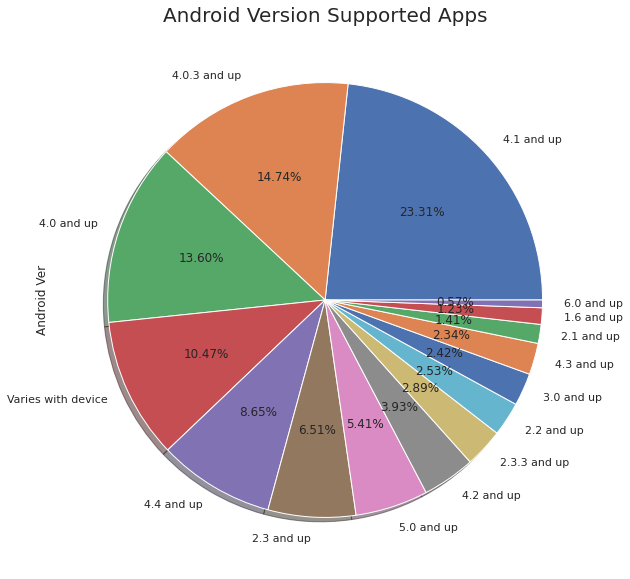

In [ ]:
plt.figure(figsize=(15,10))
a.plot(kind = 'pie',autopct='%1.02f%%',shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

**Summary**: After percentage frequency distribution of data,

 we conclude that-

android version 4.0 and above supported apps is very higher and more than 60% of total app support.

**Frequency of apps in each category ?**
--

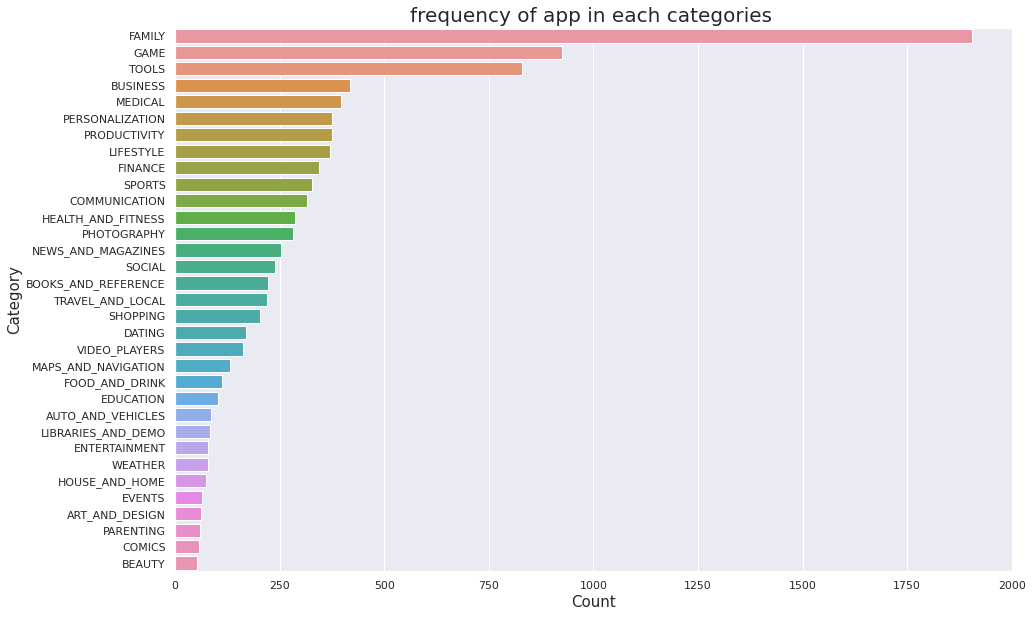

In [ ]:
plt.figure(figsize=(15,10))

y = play_store_data2['Category'].value_counts().index
x = play_store_data2['Category'].value_counts()
sns.barplot(x, y)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Category",fontsize=15)
plt.title("frequency of app in each categories ", fontsize = 20);

**Summary**:
From above Bar chart,

we conclude that-

most of the apps on play Store belongs to family category.

**Genres wise top apps in playstore**
--

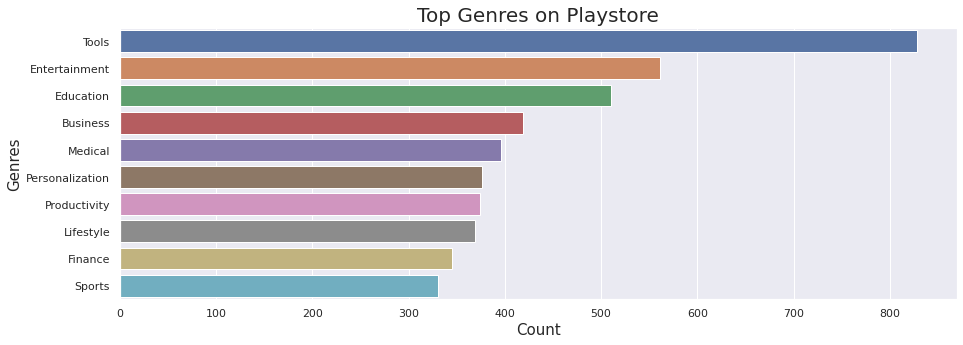

In [ ]:
y = play_store_data2['Genres'].value_counts().index
x = play_store_data2['Genres'].value_counts().head(10)
X = []
Y= []
for i in range(len(x)):
    X.append(x[i])
    Y.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genres",fontsize=15)

graph = sns.barplot(x = X, y = Y)
graph.set_title("Top Genres on Playstore", fontsize = 20)
plt.show()

**summary:**
Tools genre have the highest count followed by Entertainment

**Most Frequent Rating on playstore Apps**
--

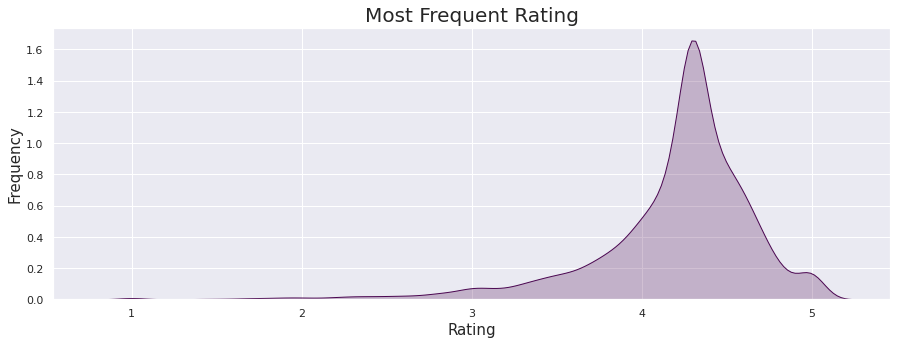

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(play_store_data2.Rating, color="#4B0751", shade = True)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title('Most Frequent Rating',size = 20)
plt.show()

**Summary**:

from the above graph, we conclude that most of the Apps in Play Store are rated in the region of 4 to 4.8.

**Distribution of Free and Paid App**
--

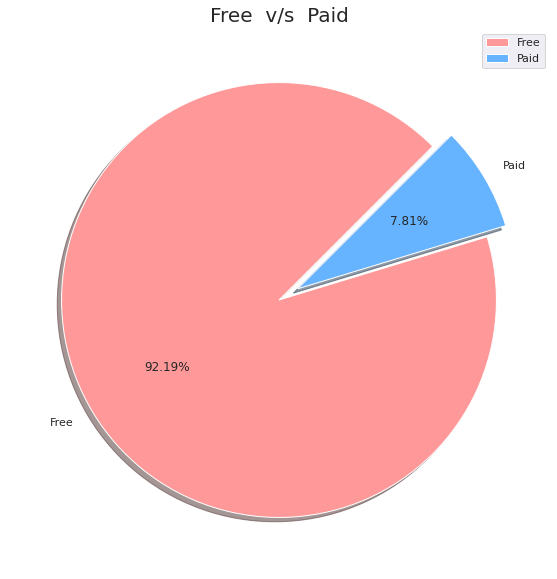

In [ ]:
#bar chart
plt.figure(figsize=(15,10))
x=play_store_data2.Type.value_counts()
Colors = ['#ff9999','#66b3ff']
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True,explode=[ 0, 0.1],startangle=45,colors=Colors)
plt.title("Free  v/s  Paid", fontsize=20)
plt.legend()
plt.show()

**Summary-4**:

* Free apps in playstore are 92.19%

* Paid apps in playstore are 7.81%



**App Updation Details By Year**
--

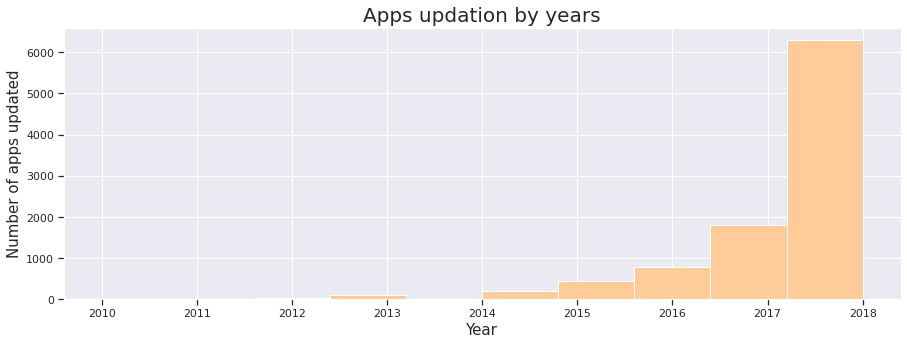

In [ ]:
#histogram
plt.figure(figsize=(15,5))
plt.title("Apps updation by years", fontsize=20)
ax = plt.hist(play_store_data2.LastUpdated_Year, color="#ffcc99")
plt.tick_params(left='on', bottom='on') 
plt.xlabel("Year",size=15)
plt.ylabel("Number of apps updated",size=15)
plt.show() 

**Summary:** 
from the above graph,

we conclude that -

most of the last update of apps on Play Store are in the year of 2017 and 2018.

In [ ]:
#free Type app data
m1=play_store_data2[play_store_data2["Type"]=="Free"]
m1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5734.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [ ]:
#value counts of last updated for each month
m2=pd.value_counts(m1["LastUpdated_Month"]).sort_index()
m2

1      423
2      474
3      572
4      516
5      849
6     1079
7     2484
8     1204
9      276
10     345
11     326
12     358
Name: LastUpdated_Month, dtype: int64

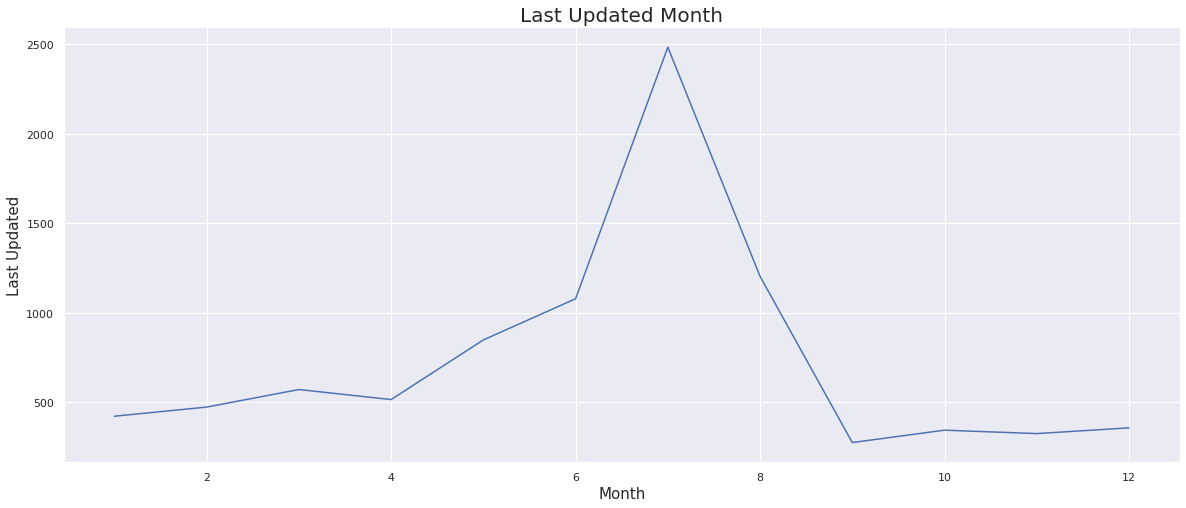

In [ ]:
#line chart 
plt.figure(figsize=(20,8))
plt.plot(m2)
plt.title("Last Updated Month",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Last Updated",fontsize=15)
plt.show()

we conclude that, Most of the last updated month of apps are on 6,7 and 8.(i.e. june,july and august)

**Distribution of Content Rating for all app**
--

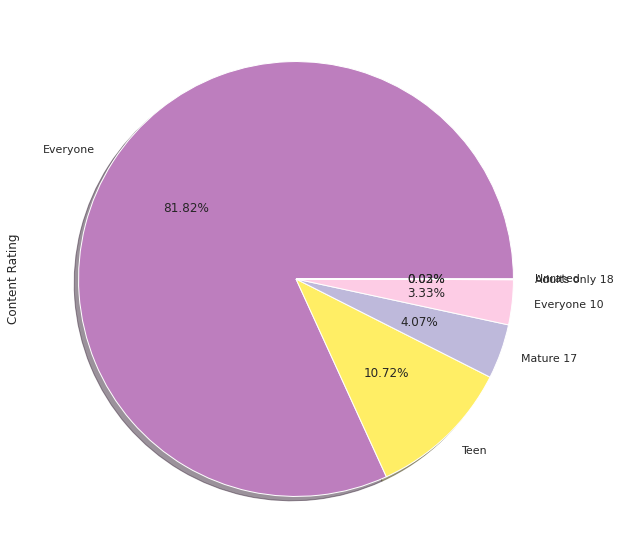

In [ ]:
#pie chart
plt.figure(figsize=(15,10))
colors=["#bd7ebe", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
pd.value_counts(play_store_data2["Content Rating"]).plot(kind = 'pie',  autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

**Summary:**
from the above pie chart,

we conclude that, Most of the app in Play Store is accessible by everyone.

**Content Rating in Free and Paid**
--

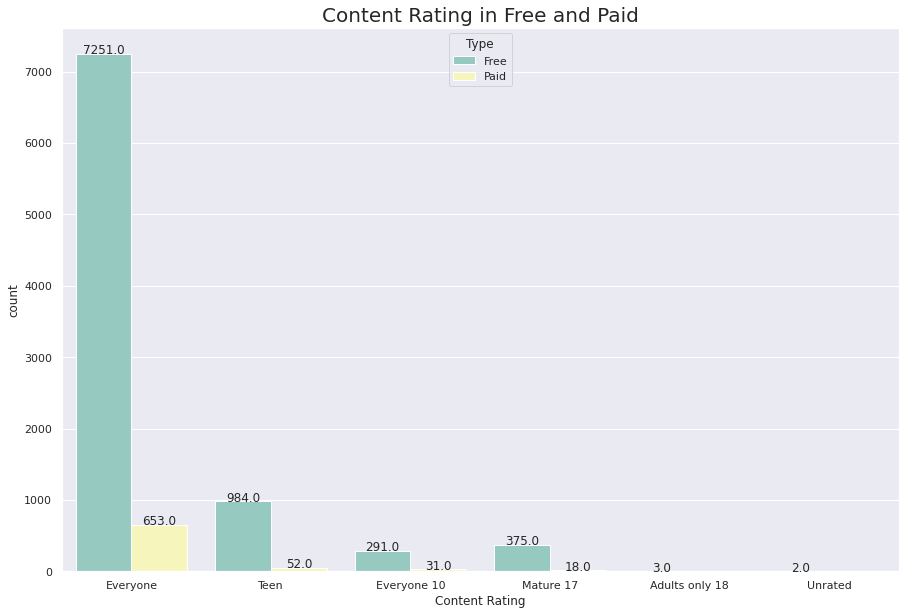

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.countplot(play_store_data2['Content Rating'],hue=play_store_data2['Type'],palette="Set3")

plt.title("Content Rating in Free and Paid",size=20)

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Summary:**
from the above chart,

 we conclude that:

 most of the apps in PlayStore are free and accessible by everyone.

**Apps Size Across Database**
-- 

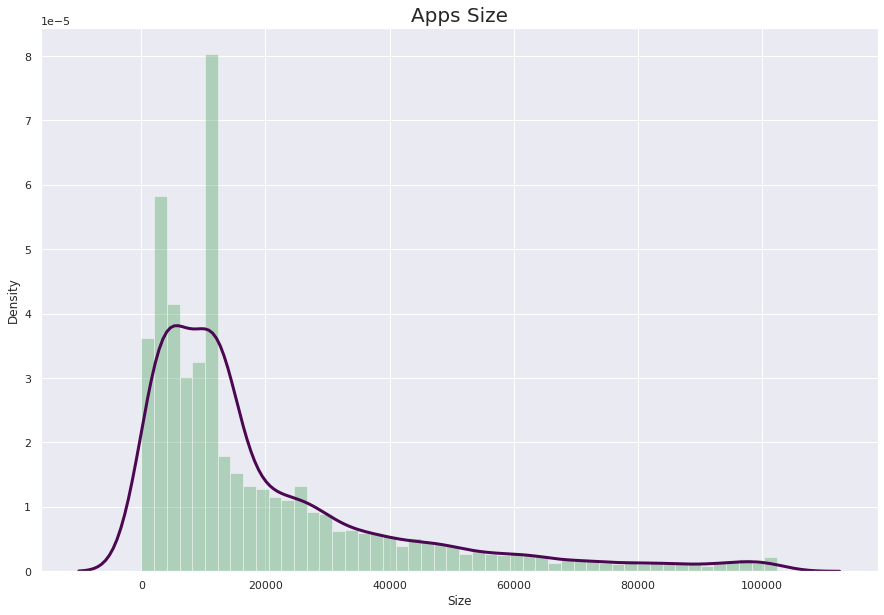

In [ ]:
#Histogram for Size
plt.figure(figsize=(15,10))
sns.distplot(play_store_data2['Size'],color='g',kde_kws={'linewidth':3,'color':'#4B0751'});
plt.title("Apps Size",size=20)
plt.show()

**Summary:**
we conclude that-

most of the apps in playstore of size between 0 to 20000kb.

In [ ]:
#merge both database for more analysis

merged_df = play_store_data2.merge(user_review_data3, on="App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.775558e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Negative,-3.472222e-02,0.581944


In [ ]:
#
e=merged_df[merged_df["Sentiment"]=="Positive"].sort_values(by='Sentiment_Polarity', ascending=False)
e

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
16458,Hideman VPN,TOOLS,4.1,88675,9830.0,5000000,Free,0.00,Everyone,Tools,2018-07-24,6.0.1,4.0 and up,24,7,2018,Positive,1.000000e+00,0.780000
22912,365Scores - Live Scores,SPORTS,4.6,666246,25600.0,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,29,7,2018,Positive,1.000000e+00,1.000000
668,Filters for Selfie,BEAUTY,4.3,8572,25600.0,1000000,Free,0.00,Everyone,Beauty,2018-05-10,1.1.0,4.0 and up,10,5,2018,Positive,1.000000e+00,1.000000
10966,ABC Kids - Tracing & Phonics,FAMILY,4.5,36606,12288.0,10000000,Free,0.00,Everyone,Educational;Education,2018-06-22,Varies with device,4.0 and up,22,6,2018,Positive,1.000000e+00,0.300000
16198,Fraction Calculator Plus Free,TOOLS,4.5,148506,11264.0,5000000,Free,0.00,Everyone,Tools,2018-07-15,Varies with device,Varies with device,15,7,2018,Positive,1.000000e+00,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,Farming Simulator 18,GAME,4.5,18125,15360.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,9,7,2018,Positive,1.387779e-17,0.766667
25399,All Social Networks,SOCIAL,4.2,22650,1536.0,1000000,Free,0.00,Everyone,Social,2018-05-21,2.4.12,4.0 and up,21,5,2018,Positive,1.387779e-17,0.594792
14739,Amtrak,TRAVEL_AND_LOCAL,3.7,16815,28672.0,1000000,Free,0.00,Everyone,Travel & Local,2018-07-15,3.1.3,5.0 and up,15,7,2018,Positive,9.251859e-18,0.500000
12764,Blogger,SOCIAL,3.7,138026,2764.0,5000000,Free,0.00,Mature 17,Social,2016-02-29,2.1.3,2.1 and up,29,2,2016,Positive,6.938894e-18,0.612500


In [ ]:
#for numerical data from merge DataFrame
num_df_columns1=[columns for columns in merged_df.columns if merged_df[columns].dtype!='O']
num_df2=merged_df[num_df_columns1].drop(columns=['LastUpdated_Day','LastUpdated_Month',"LastUpdated_Year"])
num_df2

,Rating,Reviews,Size,Installs,Price,Last Updated,Sentiment_Polarity,Sentiment_Subjectivity
0,4.4,13791,33792.0,1000000,0.0,2017-09-20,2.166667e-01,0.573810
1,4.4,13791,33792.0,1000000,0.0,2017-09-20,0.000000e+00,0.000000
2,4.4,13791,33792.0,1000000,0.0,2017-09-20,3.000000e-01,0.600000
3,4.4,13791,33792.0,1000000,0.0,2017-09-20,2.775558e-17,0.579167
4,4.4,13791,33792.0,1000000,0.0,2017-09-20,-3.472222e-02,0.581944
...,...,...,...,...,...,...,...,...
25746,4.4,36981,4096.0,1000000,0.0,2018-07-06,3.454545e-01,0.484848
25747,4.4,36981,4096.0,1000000,0.0,2018-07-06,0.000000e+00,0.000000
25748,4.4,36981,4096.0,1000000,0.0,2018-07-06,4.937500e-01,0.700000
25749,4.4,36981,4096.0,1000000,0.0,2018-07-06,5.351190e-01,0.714286


In [ ]:
#information about merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25751 entries, 0 to 25750
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     25751 non-null  object        
 1   Category                25751 non-null  object        
 2   Rating                  25751 non-null  float64       
 3   Reviews                 25751 non-null  int64         
 4   Size                    25751 non-null  float64       
 5   Installs                25751 non-null  int64         
 6   Type                    25751 non-null  object        
 7   Price                   25751 non-null  float64       
 8   Content Rating          25751 non-null  object        
 9   Genres                  25751 non-null  object        
 10  Last Updated            25751 non-null  datetime64[ns]
 11  Current Ver             25751 non-null  object        
 12  Android Ver             25751 non-null  object

**Sentiment Data Across all Reviews**
--

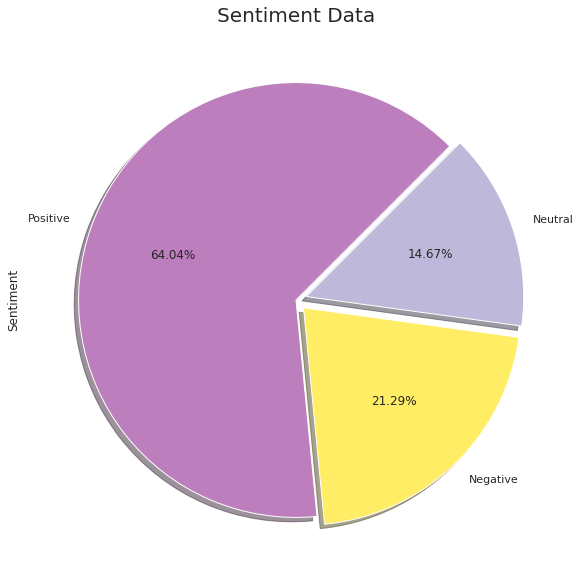

In [ ]:
#pie chart
plt.figure(figsize=(15,10))
pd.value_counts(user_review_data3["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 ,colors=colors)
plt.title("Sentiment Data",size=20)
plt.show()

we conclude that, Overall sentiment count of merged dataset in which Positive sentiment count is 64.04%, Negative  21.29% and Neutral 14.67%. 

**Trend of App Price across popular categories**
--

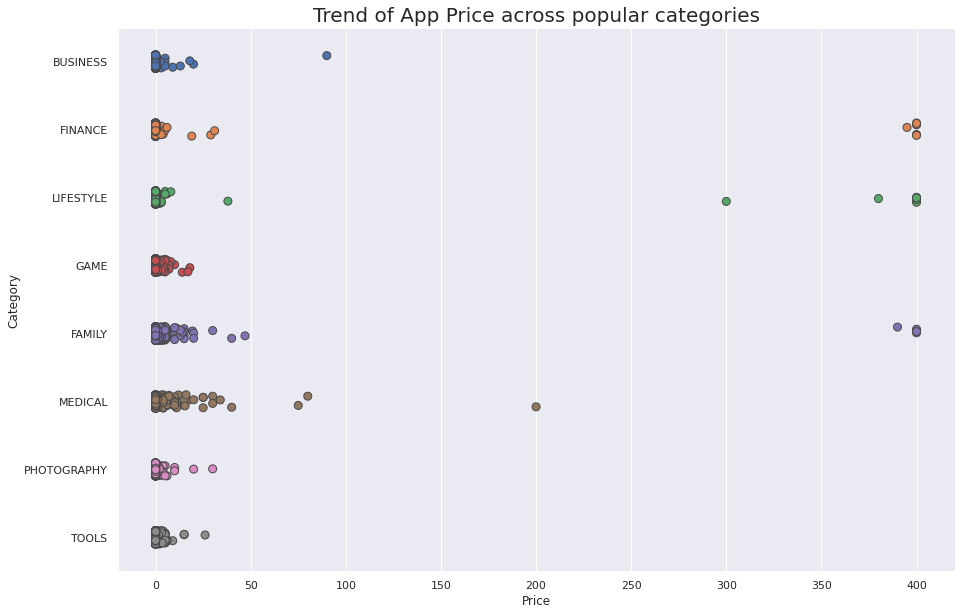

In [ ]:
#strip plot
plt.figure(figsize=(15,10))

# Select a few popular app categories
popular_app_cats = play_store_data2[play_store_data2.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
ax.set_title('Trend of App Price across popular categories',size=20)
plt.show()

From this strip plot between price and category, we infer that most of the apps on PlayStore are available for free and very few categories provide the  apps of paid type and maximum price of any app is not exceeding the $400.

**Age vs Sentiment: each age with its Positive, Negative, Neutral Sentiment**
--

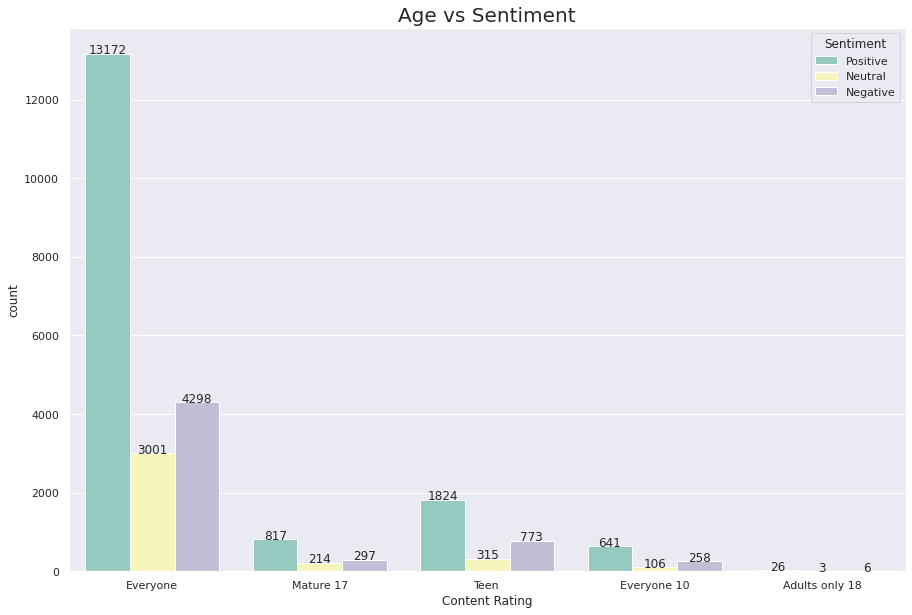

In [ ]:
#countplot
plt.figure(figsize=(15,10))
ax = sns.countplot(merged_df["Content Rating"],hue=merged_df['Sentiment'],palette="Set3");
plt.title("Age vs Sentiment",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)

plt.show()

**Feedback in Popular app category**
--

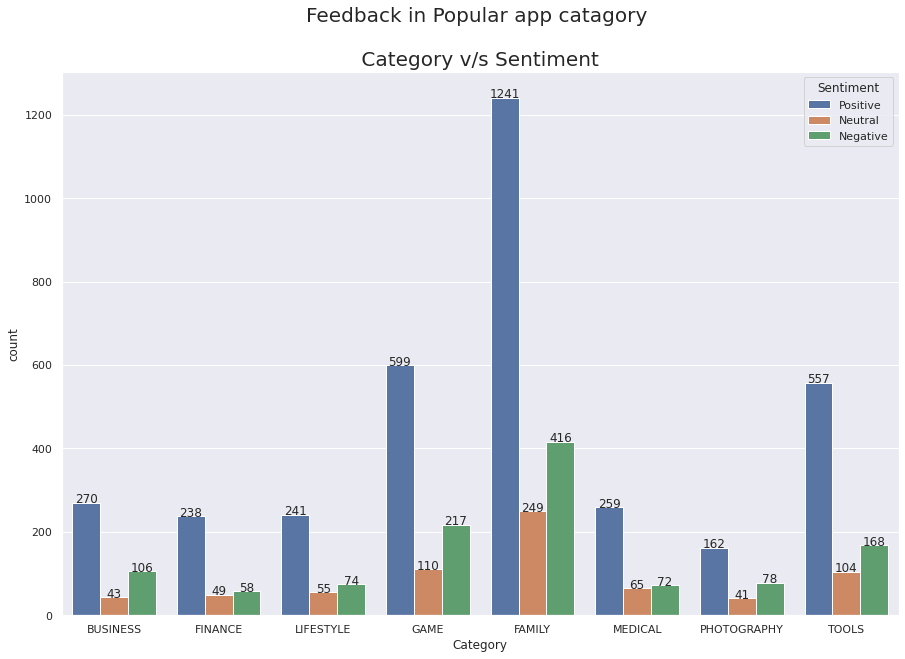

In [ ]:
#countplot
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Sentiment']);
ax.set_title("Feedback in Popular app catagory \n \n Category v/s Sentiment ",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

### These two Chart shows that each category and each content rating have the larger number of positive sentiments than negative and neutral sentiments

**Popular Category vs Type**
--

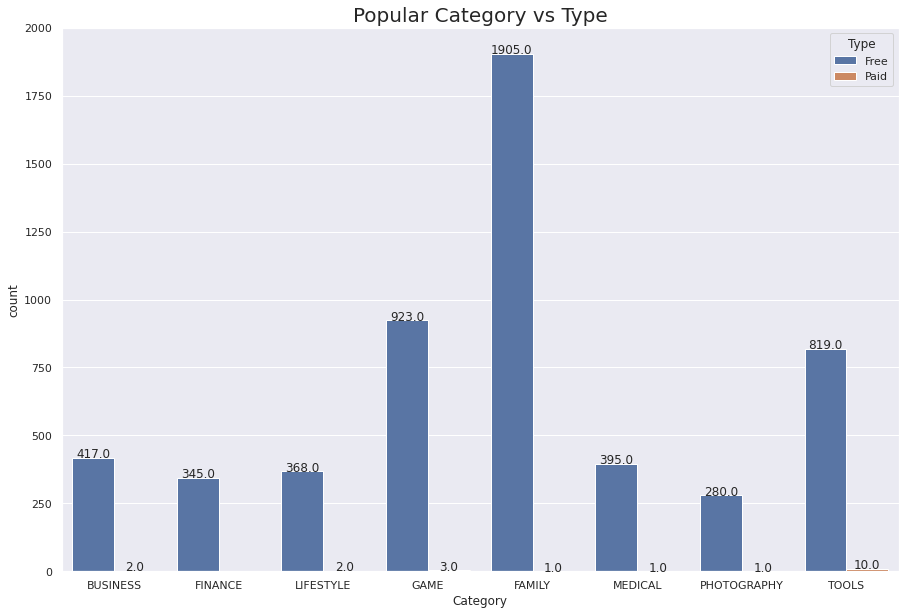

In [ ]:
#countplot
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Type']);
plt.title("Popular Category vs Type",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

we conclude that, there is maximum and minimum number of free app in family and 

**Sentiment_Polarity relation with paid and Free App**
--

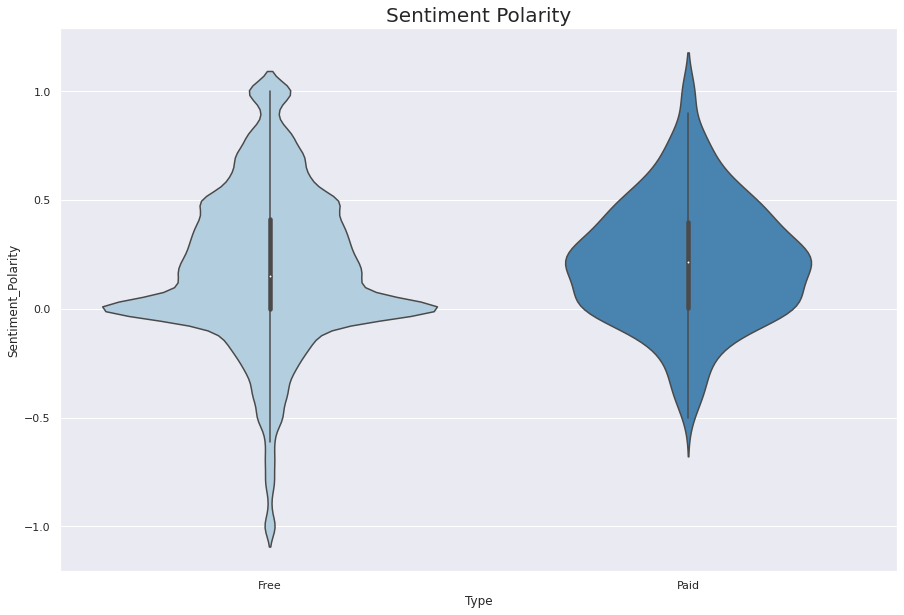

In [ ]:
#violinplot
plt.figure(figsize=(15,10))
sns.violinplot(y = merged_df["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.title("Sentiment Polarity",fontsize=20)
plt.show()

**Summary:**
--
This Violin Plot shows that density of Neutral sentiment polarity is high for both type of app.

Chances of Negative Sentiment Polarity is less for paid apps in comparison to Free apps.



**Content Rating Relation with Sentiment Polarity**
--

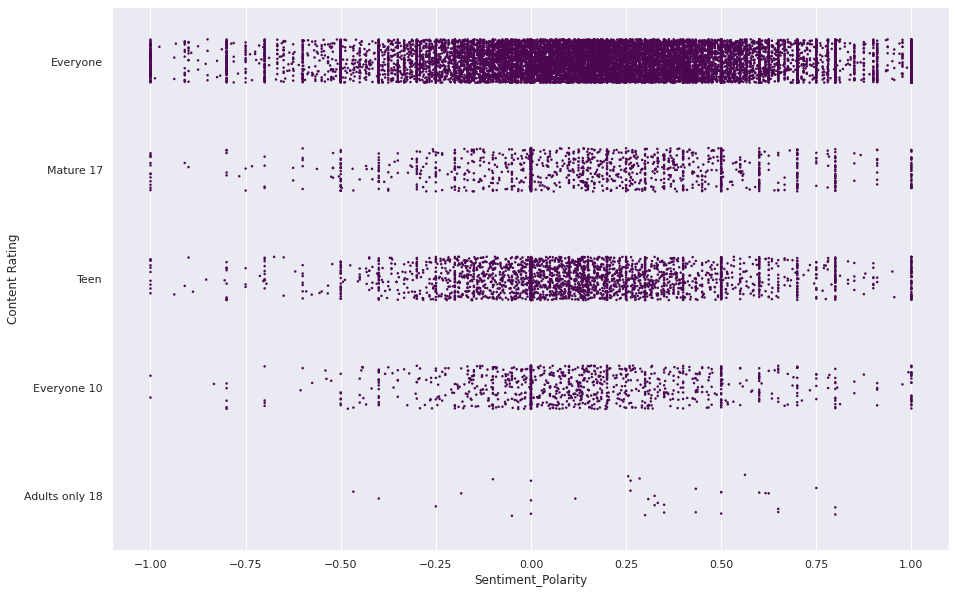

In [ ]:
#stripplot
plt.figure(figsize=(15,10))
ax = sns.stripplot(y = merged_df["Content Rating"], x = merged_df["Sentiment_Polarity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Categories Relation with Sentiment_Subjectivity**
--

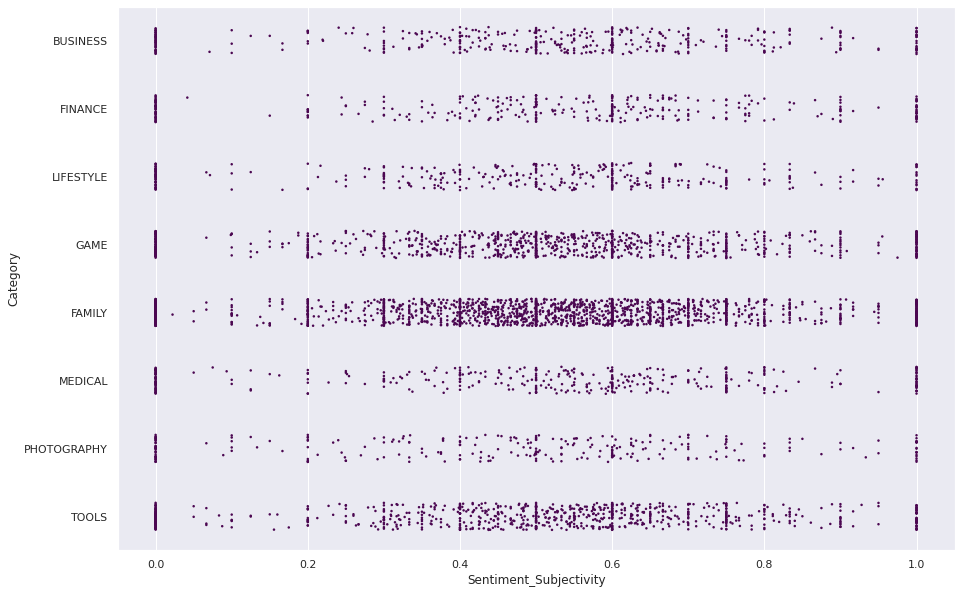

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = popular_app_cats['Category'], x = merged_df["Sentiment_Subjectivity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Pair Plot For Understanding Relations Between Different Columns**
--

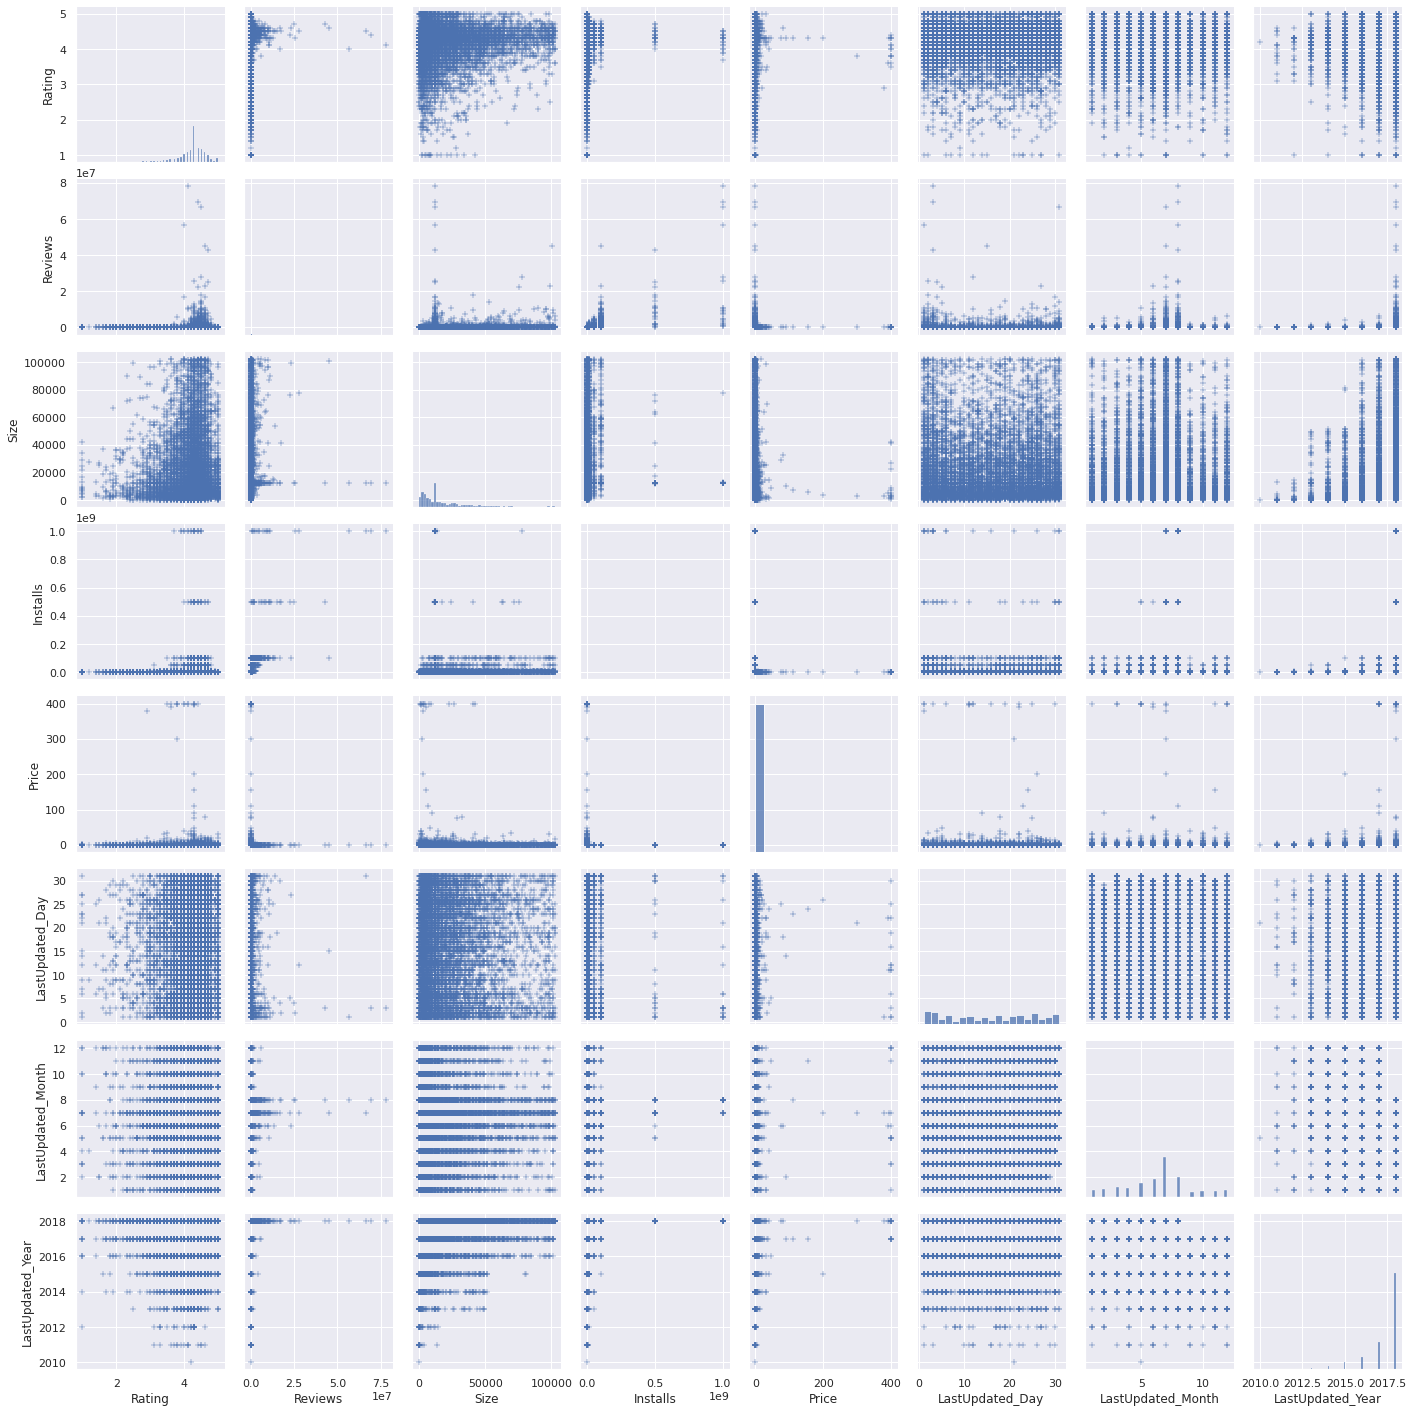

In [ ]:
#pair plot of all numerical variable
data = sns.pairplot(num_df, markers='+')

plt.show(data)

**Summary-2**: Following are main conclusion:
--

### A)	Install vs Rating 📈  --	apps with Rating 4 and above have more installation than any other apps with lower rating!

### B)	Size vs Rating 📈 	-- Mostly larger size app's are rated and near 4 rate!

**Relation between all the numerical columns**
--

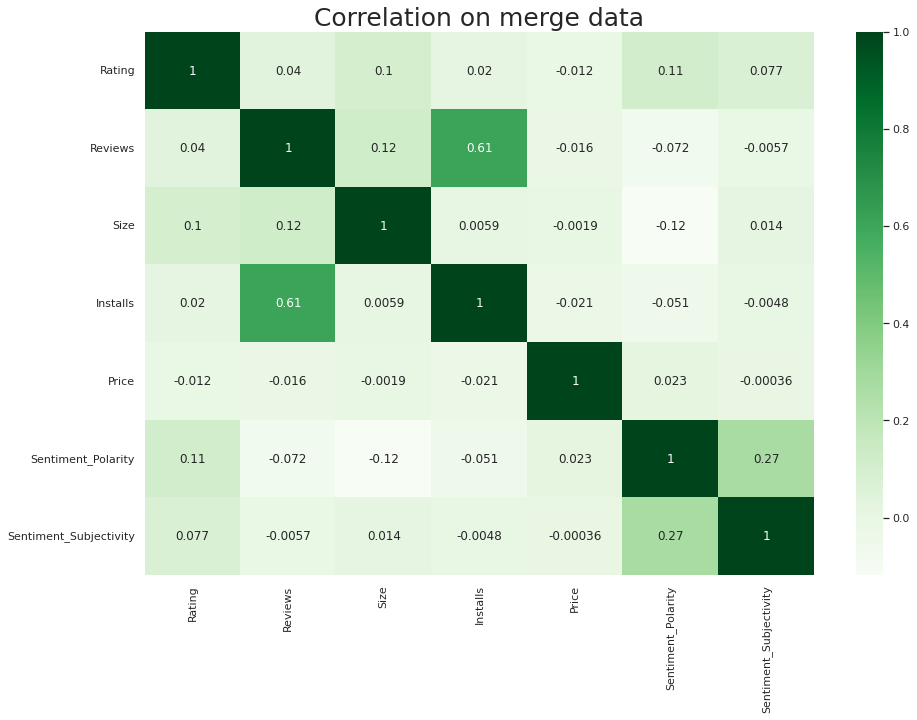

In [ ]:
#heatmap for merge data
plt.figure(figsize=(15,10))
sns.heatmap(num_df2.corr(),annot=True,cmap='Greens')
plt.title("Correlation on merge data",fontsize=25)
plt.show()

In this correlation matrix, There is not  significant relationship between  Rating, Reviews, Size and Installs  with respect to the Sentiment polarity  and Sentiment subjectivity.

In [ ]:
#revenue=installs*price
list1=[]
#doing for loop, for Installs and Price column
for i,j in zip(play_store_data2["Installs"],play_store_data2["Price"]):
  d=i*j
  list1.append(d)
#list of revenue
print(list1)  

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
Revenue=pd.DataFrame(list1,columns=["Revenue"])
Revenue

,Revenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9655,0.0
9656,0.0
9657,0.0
9658,0.0


In [ ]:
play_store_data2=play_store_data2.reset_index()

In [ ]:
#dataframe with revenue column
df4=pd.concat([play_store_data2,Revenue],axis=1)
df4

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Revenue
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018,0.0
1,2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018,0.0
2,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018,0.0
3,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018,0.0
4,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5734.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017,0.0
9656,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018,0.0
9657,10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017,0.0
9658,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015,0.0


In [ ]:
#arrange in descending order of Revenue
df5=df4.sort_values(by="Revenue",ascending=False).drop(columns=["index"])
df5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Revenue
3195,Minecraft,FAMILY,4.5,2375336,12288.0,10000000,Paid,6.99,Everyone 10,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,24,7,2018,69900000.0
4197,I am rich,LIFESTYLE,3.8,3547,1843.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,12,1,2018,39999000.0
4202,I Am Rich Premium,FINANCE,4.1,1867,4812.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,12,11,2017,19999500.0
2889,Hitman Sniper,GAME,4.6,408292,29696.0,10000000,Paid,0.99,Mature 17,Action,2018-07-12,1.7.110758,4.1 and up,12,7,2018,9900000.0
6250,Grand Theft Auto: San Andreas,GAME,4.4,348962,26624.0,1000000,Paid,6.99,Mature 17,Action,2015-03-21,1.08,3.0 and up,21,3,2015,6990000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,O Launcher,TOOLS,4.3,2059,10240.0,100000,Free,0.00,Everyone,Tools,2018-05-22,1.1.4,5.0 and up,22,5,2018,0.0
3289,Verdad o Reto,SOCIAL,3.8,826,5222.0,500000,Free,0.00,Teen,Social,2018-05-10,2.0,4.1 and up,10,5,2018,0.0
3290,Pixlr-o-matic,PHOTOGRAPHY,4.5,180697,6246.0,10000000,Free,0.00,Everyone,Photography,2017-04-25,2.2.5,2.1 and up,25,4,2017,0.0
3291,O-Level Past Papers & Solution (up to 2017),FAMILY,3.8,589,28672.0,100000,Free,0.00,Everyone,Education,2018-06-11,8.3.2,4.0.3 and up,11,6,2018,0.0


In [ ]:
#take three columns
fdf5=df5[["App","Revenue","Category"]].reset_index().drop(columns=["index"])
fdf5

,App,Revenue,Category
0,Minecraft,69900000.0,FAMILY
1,I am rich,39999000.0,LIFESTYLE
2,I Am Rich Premium,19999500.0,FINANCE
3,Hitman Sniper,9900000.0,GAME
4,Grand Theft Auto: San Andreas,6990000.0,GAME
...,...,...,...
9655,O Launcher,0.0,TOOLS
9656,Verdad o Reto,0.0,SOCIAL
9657,Pixlr-o-matic,0.0,PHOTOGRAPHY
9658,O-Level Past Papers & Solution (up to 2017),0.0,FAMILY


In [ ]:
#revenue for each category
f=df5.groupby("Category",as_index=False)["Revenue"].sum()
df6=pd.DataFrame(f)
df7=df6.sort_values(by="Revenue",ascending=False).head(15)
df7

,Category,Revenue
11,FAMILY,1.156808e+08
18,LIFESTYLE,5.758394e+07
14,GAME,4.068864e+07
12,FINANCE,2.572668e+07
24,PHOTOGRAPHY,8.547768e+06
23,PERSONALIZATION,6.796948e+06
20,MEDICAL,5.956237e+06
29,TOOLS,5.464821e+06
28,SPORTS,4.706212e+06
25,PRODUCTIVITY,4.313375e+06


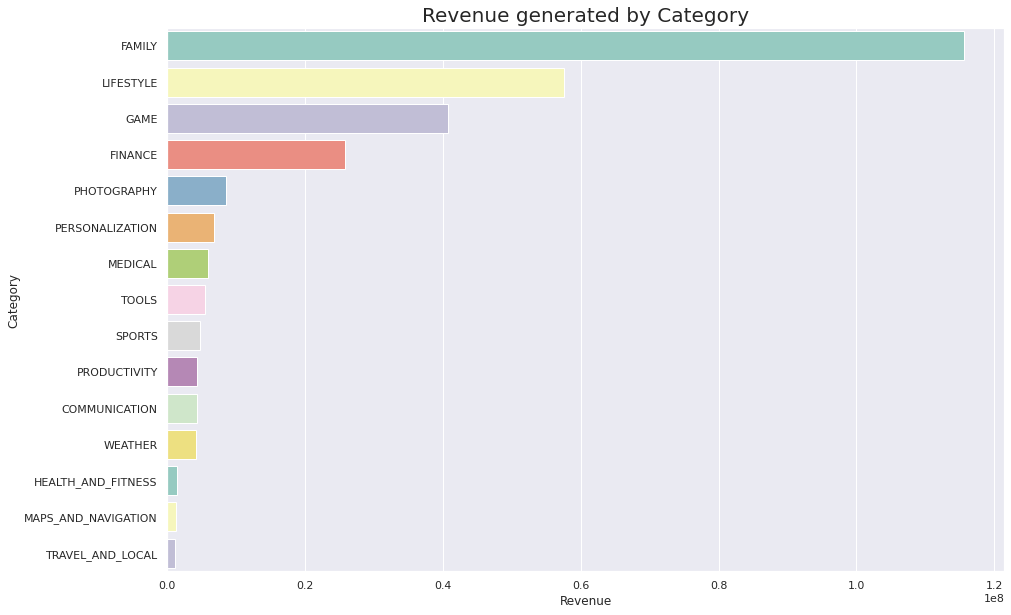

In [ ]:
#barplot
plt.figure(figsize=(15,10))
sns.barplot(x="Revenue",y="Category",data=df7,palette="Set3")
plt.title("Revenue generated by Category",fontsize=20)
plt.show()

from the above barplot, we conclude that Maximum Revenue is generate by "Family" category.

# **Conclusion:**

92.19% apps are Free and 7.81% apps are paid in type.

Android Version 4.0 and above supported apps is very higher and more than 70% of total app support.

81.80% apps have Everyone content rating.

Family, Game and Tools are top three categories having 1906, 926 and 829 app count. 

Most competitive category: Family.

Category with the highest number of installs: Game.

Tools, Entertainment, Education, Business and Medical are top Genres.

8783 Apps are having size less than or equal to 50 MB.

7749 Apps has rating more than 4.0 including both type of app.

Most of the apps in playstore of size between 0 to 20000kb.

Maximum price of any app is not exceeding the $400.

Each content rating has the larger number of positive sentiments than negative and neutral sentiments.

Apps with Rating 4 and above have more installation than any other apps with lower rating.

Mostly larger size app's are rated and near 4 rate.

Maximum Revenue is generated by Minecraft app and for category, family is on top.

Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative  22% and Neutral 14%. 